Act 2. Color segmentation
Lisa Valeria Rodriguez Alanis

Primer metodo

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2

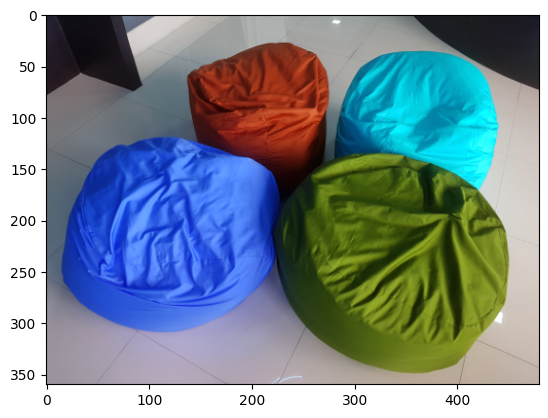

In [3]:
img= cv2.imread('bags.png')
plt.imshow(img)
plt.show()

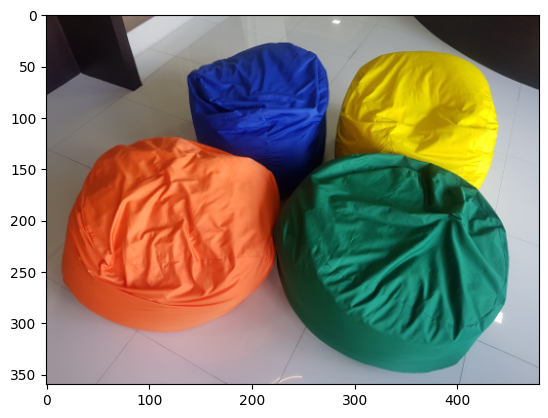

In [4]:
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

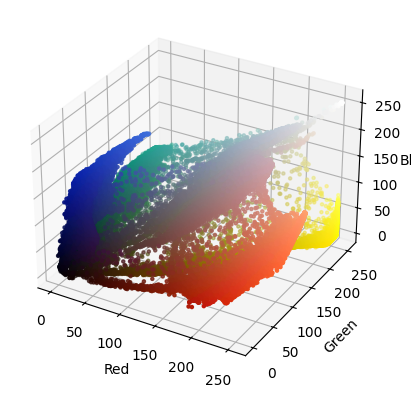

In [5]:
r,g,b= cv2.split(img)
fig= plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")
pixel_colors= img.reshape((np.shape(img)[0]*np.shape(img)[1],3))
norm= colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors= norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors= pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

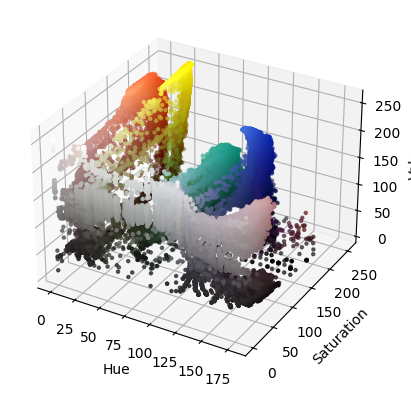

In [6]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv_img)
fig = plt.figure()
axis= fig.add_subplot(1,1,1, projection= "3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors= pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

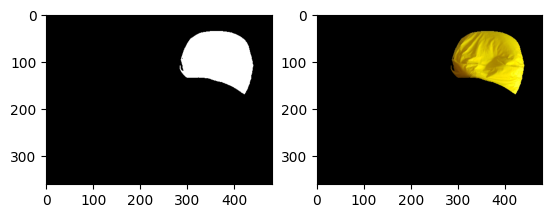

In [161]:
#Bolsa Amarilla
light_yellow = (30,255,255)
dark_yellow= (15,150,90)

#hacemos mascara
mask = cv2.inRange(hsv_img, dark_yellow, light_yellow)
result= cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap= "gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

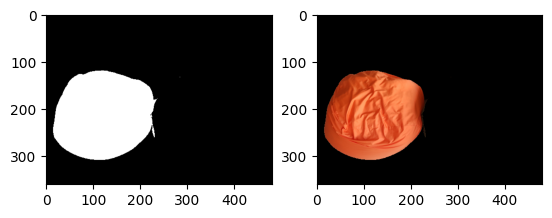

In [189]:
#Bolsa Roja
light_red = (15,255,255)
dark_red= (0,130,20)

#hacemos mascara
mask = cv2.inRange(hsv_img, dark_red, light_red)
result= cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap= "gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

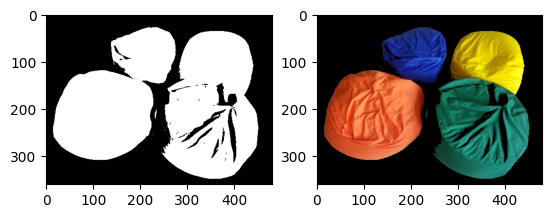

In [191]:
#Todas las bolsas
light_all = (255,255,255)
dark_all= (0,110,60)

#hacemos mascara
mask = cv2.inRange(hsv_img, dark_all, light_all)
result= cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap= "gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

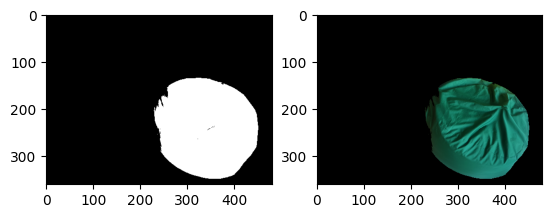

In [40]:
#Todas las bolsas
light_all = (100,250,200)
dark_all= (50,110,20)

#hacemos mascara
mask = cv2.inRange(hsv_img, dark_all, light_all)
result= cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap= "gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

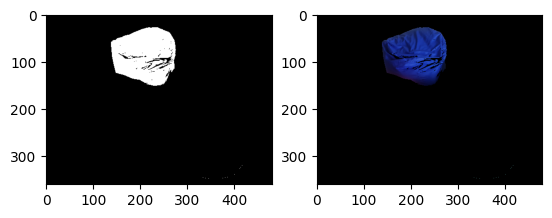

In [42]:
#Bolsa Azul
light_all = (150,230,200)
dark_all= (90,110,40)

#hacemos mascara
mask = cv2.inRange(hsv_img, dark_all, light_all)
result= cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap= "gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

Segundo Metodo

In [194]:

from skimage.io import imread, imshow
from skimage.color import rgb2hsv

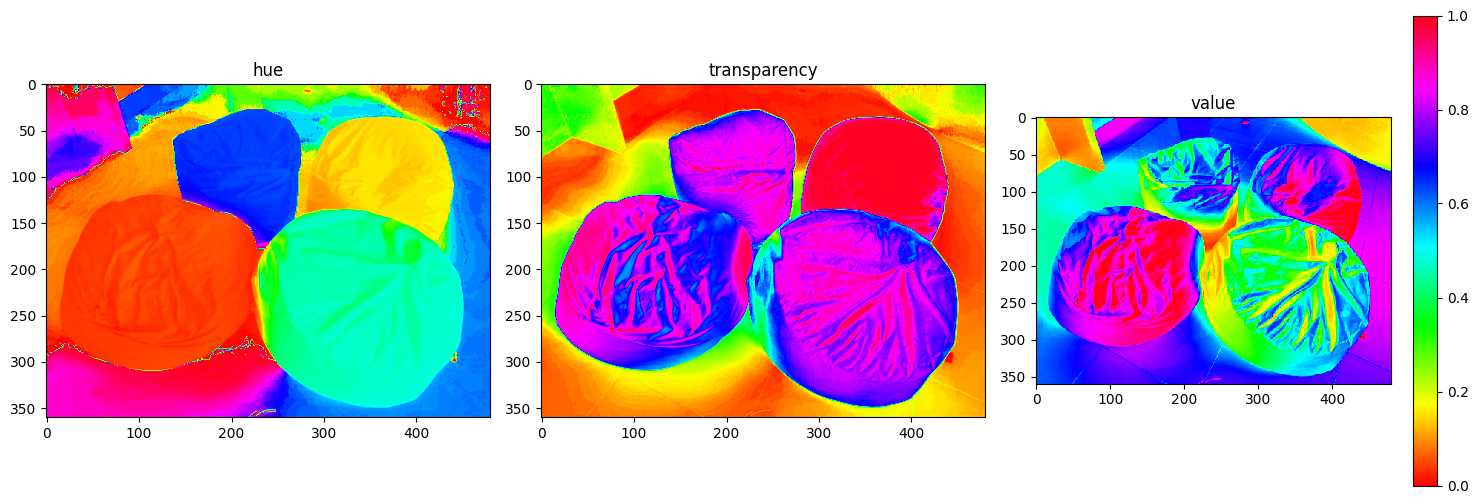

In [195]:
hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(hsv_img[:,:,1], cmap='hsv')
ax[2].set_title('value') 
fig.colorbar(imshow(hsv_img[:,:,2], cmap= 'hsv'))
#fig.tight_layout
plt.show()

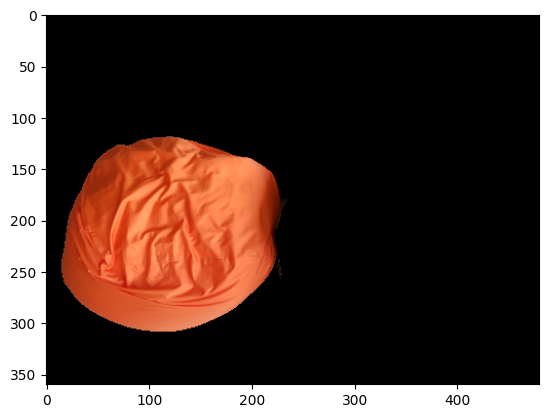

In [95]:
hsv_img = rgb2hsv(img)
#Bolsa roja
lower_mask= hsv_img[:,:,0]<0.07
upper_mask= hsv_img[:,:,0]>0.0
saturation_mask= hsv_img[:,:,1]>0.5

mask2= upper_mask*lower_mask*saturation_mask
red= img[:,:,0]*mask2
green= img[:,:,1]*mask2
blue= img[:,:,2]*mask2
img_masked = np.dstack((red,green,blue))
plt.imshow(img_masked)
plt.show()

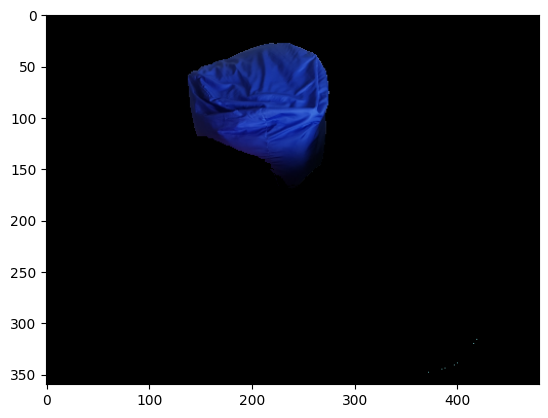

In [96]:
#Bolsa Azul
lower_mask= hsv_img[:,:,0]>0.5
upper_mask= hsv_img[:,:,0]<0.7
saturation_mask= hsv_img[:,:,1]>0.4

mask2= upper_mask*lower_mask*saturation_mask
red= img[:,:,0]*mask2
green= img[:,:,1]*mask2
blue= img[:,:,2]*mask2
img_masked = np.dstack((red,green,blue))
plt.imshow(img_masked)
plt.show()

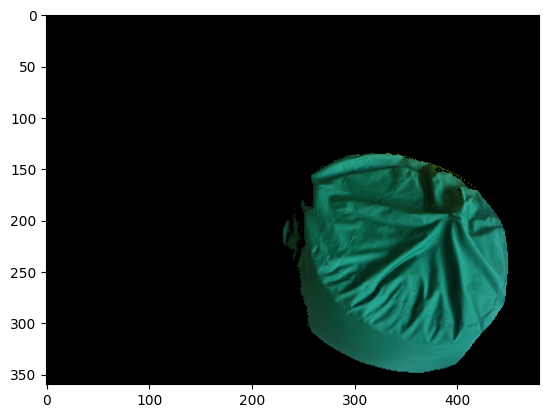

In [119]:
#Bolsa Verde
lower_mask= hsv_img[:,:,0]>0.2
upper_mask= hsv_img[:,:,0]<0.6
saturation_mask= hsv_img[:,:,1]>0.58

mask2= upper_mask*lower_mask*saturation_mask
red= img[:,:,0]*mask2
green= img[:,:,1]*mask2
blue= img[:,:,2]*mask2
img_masked = np.dstack((red,green,blue))
plt.imshow(img_masked)
plt.show()

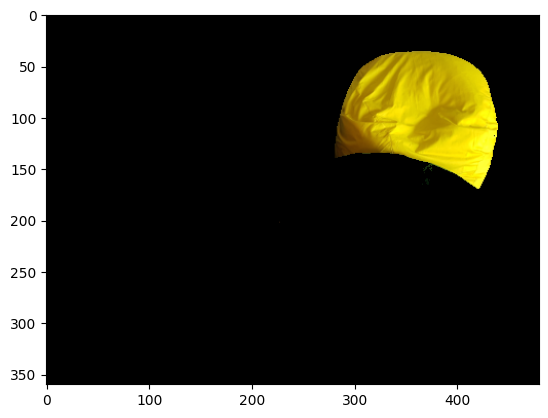

In [126]:
#Bolsa Amarilla
lower_mask= hsv_img[:,:,0]>0.07
upper_mask= hsv_img[:,:,0]<0.355
saturation_mask= hsv_img[:,:,1]>0.69

mask2= upper_mask*lower_mask*saturation_mask
red= img[:,:,0]*mask2
green= img[:,:,1]*mask2
blue= img[:,:,2]*mask2
img_masked = np.dstack((red,green,blue))
plt.imshow(img_masked)
plt.show()

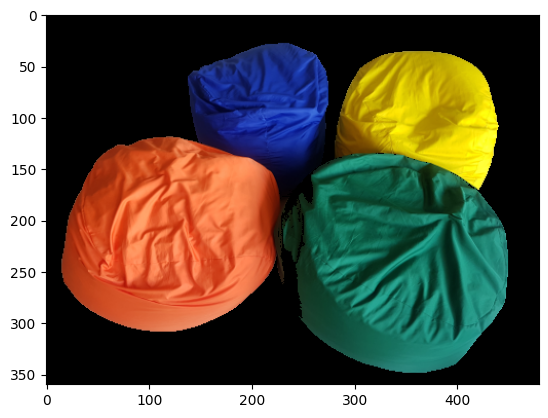

In [196]:
#Todas las bolsas
lower_mask= hsv_img[:,:,0]>0.0
upper_mask= hsv_img[:,:,0]<1
saturation_mask= hsv_img[:,:,1]>0.5

mask2= upper_mask*lower_mask*saturation_mask
red= img[:,:,0]*mask2
green= img[:,:,1]*mask2
blue= img[:,:,2]*mask2
img_masked = np.dstack((red,green,blue))
plt.imshow(img_masked)
plt.show()